# Lab-4 
**NAME: SRINATH M KRISHNAN | NET ID: SMK220008**

### Quick review of different scalers  

Below simulation and graphs are provided to demonstrate difference between different scalers

- Robust scaler - provides better encoding for distributions with outliers
- Standard scaler - provides scaling for distributions close to normal
- Min-Max scaler - general scaler but with weak point in regard to outliers

You will need to install "seaborn" library in your virtual environment

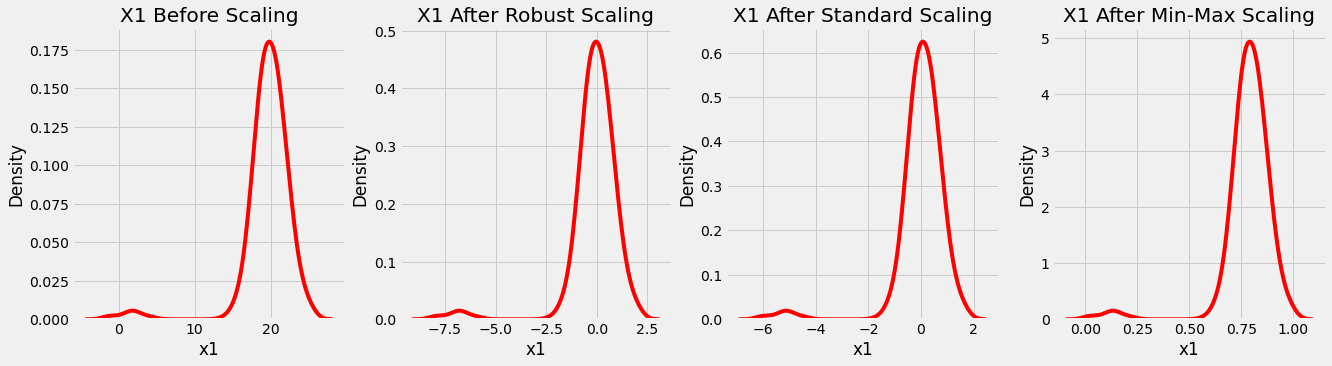

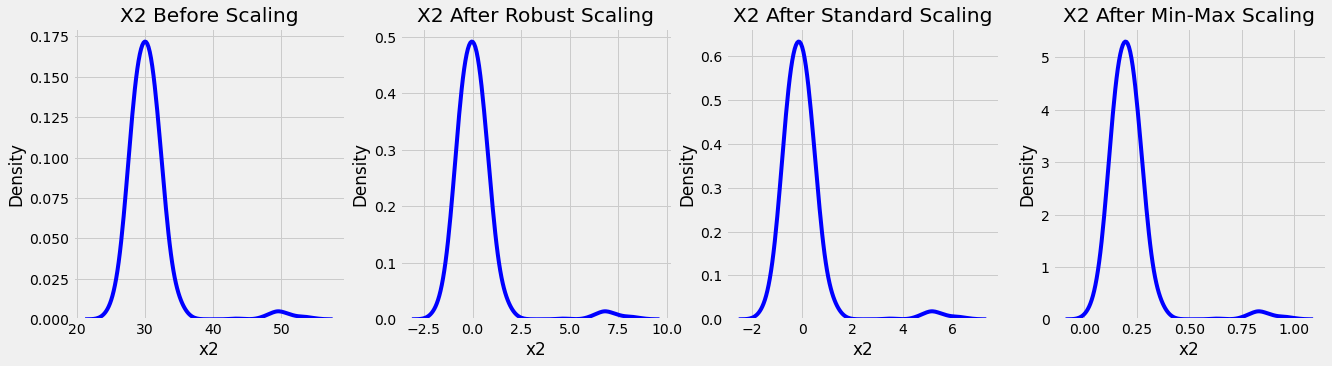

In [10]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
matplotlib.style.use('fivethirtyeight')

# data
x = pd.DataFrame({
	# Distribution with lower outliers
	'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
	# Distribution with higher outliers
	'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X1 Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')

ax2.set_title('X1 After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='r')

ax3.set_title('X1 After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='r')

ax4.set_title('X1 After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='r')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('X2 Before Scaling')
sns.kdeplot(x['x2'], ax = ax1, color ='b')

ax2.set_title('X2 After Robust Scaling')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='b')

ax3.set_title('X2 After Standard Scaling')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='b')
ax4.set_title('X2 After Min-Max Scaling')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='b')
plt.show()

## Preparation

Use dataset provided in the eLearning

In [12]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [14]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [196]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('Car_Prices_Poland_train.csv')
X_test  = pd.read_csv('Car_Prices_Poland_test.csv')

In [299]:
numeric

['year', 'mileage', 'vol_engine']

In [305]:
unscaled_train=X_train[['year','mileage','vol_engine']]
unscaled_test=X_test[['year','mileage','vol_engine']]

In [198]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (88445, 10)
Test shape: (29482, 10)


In [200]:
X_train.isna().sum()

mark                   0
model                  0
generation_name    22551
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [202]:
X_train.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,insignia,gen-a-2008-2017,2009,106125,1796,Gasoline,Częstochowa,Śląskie,25000
1,skoda,fabia,gen-ii-2007,2010,207000,1200,Gasoline,Bydgoszcz,Kujawsko-pomorskie,11900
2,opel,insignia,gen-a-2008-2017,2013,195000,1956,Diesel,Ruda Śląska,Śląskie,24598
3,audi,a4,gen-b8-2007-2015,2012,280000,1968,Diesel,Białystok,Podlaskie,41900
4,citroen,c4-picasso,gen-ii-2013-c4-picasso,2014,122200,1560,Diesel,Dziemionna,Kujawsko-pomorskie,39500


In [204]:
X_train.describe()

,year,mileage,vol_engine,price
count,88445.000000,8.844500e+04,88445.000000,8.844500e+04
mean,2012.933428,1.408320e+05,1812.341907,7.034750e+04
std,5.684016,9.251080e+04,646.731501,8.527590e+04
min,1964.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.463000e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.390000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [206]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,mark,23,object,3,13,"{'audi': 9042, 'opel': 8898, 'bmw': 8306, 'vol..."
1,model,328,object,1,16,"{'astra': 2479, 'seria-3': 2228, 'a4': 2181, '..."
2,generation_name,364,object,3,30,"{'gen-8p-2003-2012': 1179, 'gen-j-2009-2015': ..."
3,year,51,int64,4,4,"{2021: 7963, 2017: 6672, 2018: 6482, 2016: 529..."
4,mileage,27980,int64,1,7,"{1: 2809, 5: 2416, 10: 1089, 180000: 541, 2200..."
5,vol_engine,465,int64,1,4,"{1598: 7636, 1968: 6101, 1995: 4868, 1997: 400..."
6,fuel,6,object,3,8,"{'Gasoline': 46298, 'Diesel': 36212, 'LPG': 31..."
7,city,3951,object,2,24,"{'Warszawa': 5980, 'Łódź': 2498, 'Kraków': 225..."
8,province,23,object,1,24,"{'Mazowieckie': 16685, 'Śląskie': 12517, 'Wiel..."
9,price,8025,int64,3,7,"{19900: 1009, 39900: 858, 29900: 853, 18900: 8..."


Explore valid values and counts for the variable `mark` 

In [209]:
desc_df.iloc[0]["Level_Values"]

{'audi': 9042,
 'opel': 8898,
 'bmw': 8306,
 'volkswagen': 8072,
 'ford': 7216,
 'mercedes-benz': 5325,
 'renault': 5202,
 'skoda': 4412,
 'toyota': 3878,
 'peugeot': 3848,
 'volvo': 3299,
 'hyundai': 3042,
 'kia': 2828,
 'nissan': 2332,
 'mazda': 2157,
 'fiat': 2150,
 'seat': 2132,
 'citroen': 2031,
 'honda': 1620,
 'mitsubishi': 851,
 'mini': 810,
 'alfa-romeo': 535,
 'chevrolet': 459}

## Question 1 - 1 point

Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

In [212]:
for col in X_test.columns:
    if X_test[col].isna().any() == True:
        print(col)

generation_name


In [214]:
for col in X_train.columns:
    if X_test[col].isna().any() == True:
        print(col)

generation_name


In [216]:
category=['generation_name']
for i in category:
    X_train[i]=X_train[i].fillna("Missing")
    X_test[i]=X_test[i].fillna("Missing")

KeyError: 'City'

## Question 2 - 3 points

For the categorical variables listed below:  
- Use LabelEncoder to encode if number of levels is more than 24 (including)
- Use one-hot-encoding to encode if number of levels is less than or equal to 23. You can use Pandas or `sklearn` approach
- make sure encoder is created from X_train only
- X_test will be encoded from the corresponding encoder above
- Give new columns names "Original-name"_le or "Original-name"_cat_name. Where "cat_name" is valid value present in categorical feature. For example, if column "A" contains values "a, b,c" new column names will be "A_a", "A_b" and "A_c"

One hot encoder, good starting point: https://www.guidodiepen.nl/2021/02/keeping-column-names-when-using-sklearn-onehotencoder-on-pandas-dataframe/

**Don't copy the code, only use the approach!!!**

**Relevant for both Encoders.**

You will need to handle situation when certain value of categorical variable doesn't appear in Training set but present in Testing set. Simple way to handle it, is to concatenate the sets. More complex (correct way for production scenario) way see discussion here. You can choose either way and can re-use code below.
https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values
Add "Unknown" label, the discussion with 31 votes:
```
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
```        

Don't use target encoding. Target encoding doesn't work well with Linear models.

In [219]:
len_data = len(X_train)
for col in X_train.drop(columns=['price']).columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  mark  has  23  values
Column  model  has  328  values
Column  generation_name  has  365  values
Column  fuel  has  6  values
Column  city  has  3951  values
Column  province  has  23  values


In [221]:
len_data = len(X_test)
for col in X_test.drop(columns=['price']).columns:
  if X_test[col].dtype == 'object':
    print("Column ",col," has ",X_test[col].nunique()," values")

Column  mark  has  23  values
Column  model  has  328  values
Column  generation_name  has  364  values
Column  fuel  has  6  values
Column  city  has  2446  values
Column  province  has  18  values


In [223]:
label_cat=[]
onehot_cat=[]
len_data = len(X_train)
for col in X_train.drop(columns=['price']).columns:
  if X_train[col].dtype == 'object':
    if X_train[col].nunique()<=23:
        onehot_cat.append(col)
    else:
        label_cat.append(col)
        
numeric=[]
for col in X_train.drop(columns=['price']).columns:
  if X_train[col].dtype == 'int64':
        numeric.append(col)
numeric  

['year', 'mileage', 'vol_engine']

In [225]:
onehot_cat

['mark', 'fuel', 'province']

In [227]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [229]:
from sklearn.preprocessing import LabelEncoder
cat_encoders={}
for var in label_cat:
    # Label Encoding
    le = LabelEncoder()
    le.fit(X_train[var].append(X_test[var]))  # Or fit only on train
    X_train[f"{var}_le"] = le.transform(X_train[var])
    X_test[f"{var}_le"] = le.transform(X_test[var])  # Handling unseen values
    cat_encoders[(var, "le")] = le

In [231]:
#X_train_ohe = pd.get_dummies(X_train, columns=onehot_cat)
#X_test_ohe = pd.get_dummies(X_test, columns=onehot_cat)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
fit = encoder.fit(X_train[['mark', 'fuel', 'province']])
X=fit.transform(X_train[['mark', 'fuel', 'province']])
X

<88445x52 sparse matrix of type '<class 'numpy.float64'>'
	with 265335 stored elements in Compressed Sparse Row format>

In [245]:
X_t=fit.transform(X_test[['mark', 'fuel', 'province']])

In [247]:
train_names=encoder.get_feature_names_out()
X_ohe = pd.DataFrame.sparse.from_spmatrix(X, columns=train_names)
X_t_ohe = pd.DataFrame.sparse.from_spmatrix(X_t, columns=train_names)

In [257]:
X_train_ohe=pd.concat([X_train, X_ohe], axis="columns")
X_test_ohe=pd.concat([X_test,X_t_ohe],axis="columns")

## Question 3 - 1 point

Use **Standard** scaler to encode numerical variables. Do not to scale new columns you have created as part of categorical features encoding


In [259]:
for var in numeric:
    print(var)
    scaler = preprocessing.StandardScaler()
    X_train_ohe[f"{var}_sc"] = scaler.fit_transform(X_train[var].to_frame())
    X_test_ohe[f"{var}_sc"] = scaler.fit_transform(X_test[var].to_frame())

year
mileage
vol_engine


In [263]:
X_train_ohe = X_train_ohe.drop(columns=['model','generation_name','year','mileage','city','price','vol_engine','mark','fuel','province'])
X_test_ohe = X_test_ohe.drop(columns=['model','generation_name','year','mileage','city','price','vol_engine','mark','fuel','province'])

In [307]:
X_train_unscaled=pd.concat([X_train_ohe,unscaled_train],axis="columns")
X_test_unscaled=pd.concat([X_test_ohe,unscaled_test],axis="columns")

In [317]:
X_train_unscaled.drop(inplace=True,columns=['year_sc','mileage_sc','vol_engine_sc'])

KeyError: "['year_sc', 'mileage_sc', 'vol_engine_sc'] not found in axis"

In [319]:
X_test_unscaled.drop(inplace=True,columns=['year_sc','mileage_sc','vol_engine_sc'])

## Question 4 - 2 points

  
Train `LinearRegression` on the Train dataset to predict `price`. 

Score Test dataset. Report performance metrics for both, Train and Test datasets.
Report following metrics:
- R-square
- Mean absolute error

In [287]:
y_test.size , X_test_ohe.size

(29482, 1709956)

In [291]:
y_train=X_train['price']
y_test=X_test['price']
drops=['model','generation_name','year','mileage','city','price','vol_engine']
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()
 
regr.fit(X_train_ohe, y_train)

y_pred = regr.predict(X_test_ohe)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [ 7.43628411e+01 -2.46297597e+01 -8.76405607e-02  1.08064880e+04
  3.78204820e+04  2.70566074e+04 -2.40745889e+04 -3.52641860e+03
 -1.90995417e+04 -5.53033394e+03  8.80097231e+03 -2.01079782e+04
 -1.95929059e+04 -9.27681563e+03  5.50707425e+04 -5.12850738e+01
 -1.54677328e+04 -1.02781586e+04 -7.90844005e+03 -1.12039097e+02
 -1.03506971e+04 -7.43684203e+01 -7.99260896e+03 -1.47036409e+04
  8.45534921e+03  2.01369125e+04 -3.40800336e+04 -2.36068577e+04
  9.44190091e+04 -2.64234247e+04  1.06971102e+04 -2.10058034e+04
  2.08678207e+04 -7.85927006e+03  1.18155948e+04  1.21149352e+04
  6.88304014e+03  1.03367582e+04  9.77990848e+03  1.01051808e+04
  1.78911629e+03 -1.47439966e+04 -7.21185768e+04  9.49852090e+03
  5.90402497e+03  1.71805582e+03  1.72345254e+04 -8.49837120e+04
  1.48500304e+04 -1.36929510e+04  7.89364483e+03  9.46133025e+03
  1.37141491e+04  1.42794194e+04  1.51524509e+04  3.45940655e+04
 -2.63272373e+04  2.84615019e+04]
Mean squared error: 2381663836.79
Coeffi

## Question 5 - 2 points

Train RidgeRegression on the Train dataset. Use `alpha=.2`. Score Test dataset. Report performance metrics for for both, Train and Test datasets. Report following metrics:
- R-square
- Mean absolute error


In [295]:
from sklearn.linear_model import Ridge
regr = Ridge(alpha=0.2)
 
regr.fit(X_train_ohe, y_train)

y_pred = regr.predict(X_test_ohe)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [ 7.43660377e+01 -2.46325880e+01 -8.77921536e-02  1.08022279e+04
  3.78194717e+04  2.70562854e+04 -2.40640285e+04 -3.52618733e+03
 -1.90965813e+04 -5.52987646e+03  8.80057472e+03 -2.01067958e+04
 -1.95913829e+04 -9.27537094e+03  5.50700608e+04 -6.62292304e+01
 -1.54639482e+04 -1.02769534e+04 -7.90821027e+03 -1.11840430e+02
 -1.03503008e+04 -7.43008968e+01 -7.99559958e+03 -1.47017824e+04
  8.45528949e+03  2.01354785e+04 -3.42361824e+04 -2.35694929e+04
  9.44262438e+04 -2.63861214e+04  1.07330196e+04 -2.09674667e+04
  1.63352549e+04 -7.60188856e+03  1.05522447e+04  1.08511728e+04
  5.61947861e+03  9.07277014e+03  8.51706978e+03  8.84200885e+03
  5.23028585e+02 -1.33383750e+04 -6.11388588e+04  8.23446370e+03
  4.64064941e+03  4.54845468e+02  1.59712150e+04 -7.17086228e+04
  1.35857081e+04 -1.35957792e+04  6.63048426e+03  8.19787353e+03
  1.24509110e+04  1.30162552e+04  1.38880902e+04  3.45942941e+04
 -2.63268434e+04  2.84608844e+04]
Mean squared error: 2381670547.67
Coeffi

## Question 6 - 2 points

Train LassoRegression on the Train dataset. Use `alpha=.2`. Score Test dataset. Report performance metrics for both, Train and Test datasets. Report following metrics:
- R-square
- Mean absolute error


In [323]:
from sklearn.linear_model import Lasso
regr = Lasso(alpha=0.2)
 
regr.fit(X_train_ohe, y_train)

y_pred = regr.predict(X_test_ohe)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Mean squared error: 2381729200.74
Coefficient of determination: 0.66


## Question 7 - 2 points

Calculate and print scaled and unscaled coeficients and intercent for the Lasso regression model. 

Clarification:
- Unscaled coeficients can be applied to non-standardized (un-scaled) data to produce target.
- If you have scaled your dataset and trained linear model, the coeficients are calculated for scaled (standardized) data, and can be used to produce relative feature importance.

In [332]:
# The coefficients
print("Scaled Coefficients: \n", pd.DataFrame(zip(X_train_ohe.columns, regr.coef_)))
print("Scaled intercept: \n", regr.intercept_)
regr2 = Lasso(alpha=0.2)
regr2.fit(X_train_unscaled, y_train)
y_pred = regr2.predict(X_test_unscaled)
print("Unscaled Coefficients: \n", pd.DataFrame(zip(X_train_unscaled.columns, regr2.coef_)))
print("Unscaled intercept: \n", regr2.intercept_)

Scaled Coefficients: 
                                     0              1
0                            model_le      74.363462
1                  generation_name_le     -24.637183
2                             city_le      -0.087577
3                     mark_alfa-romeo   11799.464224
4                           mark_audi   38838.604425
5                            mark_bmw   28080.665072
6                      mark_chevrolet  -23009.502465
7                        mark_citroen   -2491.169484
8                           mark_fiat  -18062.313957
9                           mark_ford   -4500.107278
10                         mark_honda    9820.128211
11                       mark_hyundai  -19074.303144
12                           mark_kia  -18557.688457
13                         mark_mazda   -8241.217575
14                 mark_mercedes-benz   56094.948068
15                          mark_mini     932.383837
16                    mark_mitsubishi  -14418.012148
17                     

## Question 8 - 2 points

Review coefficients and intercept of Lasso regression.
What can you tell about the model based on the coefficients and the intercept?
Include following:
- How can you explain to your manager meaning of coefficient?
- Should you use scaled or un-scaled (standard) coeficients? 
- What is the most important variable and how does it impact price? 
- What is the least important variable? How does it impact price prediction?

1) A coefficient in a Lasso regression model represents the change in the dependent variable (e.g., price) for a one-unit change in the predictor variable, holding all other predictors constant. It quantifies the impact of that specific variable on the outcome. If a coefficient is positive, it means that as the predictor increases, the dependent variable tends to increase. Conversely, if it's negative, the dependent variable tends to decrease as the predictor increases. Lasso also has the characteristic of shrinking some coefficients to exactly zero, which means it effectively selects a simpler model that does not include those variables.

2. For most applications of Lasso regression, especially when dealing with variables of different scales and units, using scaled coefficients is recommended. This approach enhances the interpretability of the model regarding variable importance and ensures that the regularization penalty is applied uniformly. It facilitates a clearer understanding of which features are most predictive of the outcome, a key advantage when explaining the model to stakeholders or using the model for feature selection.

3. Electric Fuel Type: The variable associated with fuel_Electric, having a coefficient of approximately 115922.941 in the scaled model, stands out as the most influential predictor. This suggests that electric vehicles are significantly more expensive compared to the baseline fuel type category. The large positive coefficient indicates a strong positive impact on price, highlighting the premium associated with electric vehicles.


4. Zero Coefficients: Variables like  province_Berlin have coefficients shrunk to zero, indicating they do not significantly impact the price prediction. This feature selection aspect of Lasso helps in identifying predictors that are not useful for the model, thus simplifying the model and potentially improving its interpretability.